In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
pd.options.display.max_columns = 200

In [2]:
sns.__version__

'0.11.0'

In [3]:
pd.__version__

'1.3.5'

In [4]:
data_country_s=pd.read_csv('EdStatsCountry-Series.csv')
data_country=pd.read_csv('EdStatsCountry.csv')
data_stat=pd.read_csv('EdStatsData.csv')
data_f=pd.read_csv('EdStatsFootNote.csv')
data_s=pd.read_csv('EdStatsSeries.csv')

In [5]:
data_country_s.shape

(613, 4)

In [6]:
data_country_s

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [7]:
data_country_s.iloc[0,2]

'Data sources : United Nations World Population Prospects'

<AxesSubplot:>

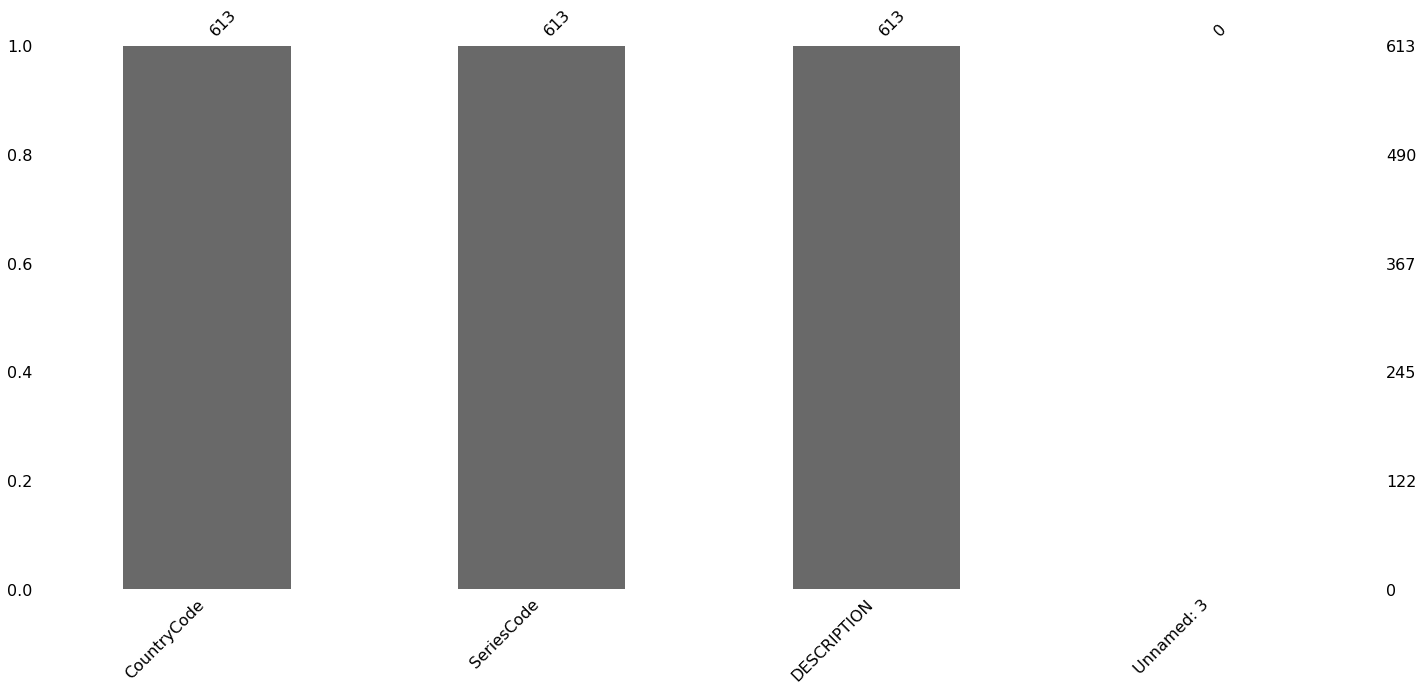

In [8]:
msno.bar(data_country_s)


In [9]:
data_country.shape

(241, 32)

In [10]:
data_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


Cette table représente les pays, ça sera notre base pour le dataset

In [11]:
data_final=data_country[['Country Code', 'Table Name', 'Region']]
data_final

,Country Code,Table Name,Region
0,ABW,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,ALB,Albania,Europe & Central Asia
4,AND,Andorra,Europe & Central Asia
...,...,...,...
236,XKX,Kosovo,Europe & Central Asia
237,YEM,"Yemen, Rep.",Middle East & North Africa
238,ZAF,South Africa,Sub-Saharan Africa
239,ZMB,Zambia,Sub-Saharan Africa


J'ai gardé les informations primaire des pays, le code pour la jointure, le nom pour connaitre le pays, et la région pour regrouper les pays et viser les régions intéréssantes

In [12]:
data_final.columns=['Country Code', 'Country Name', 'Region']
data_final=data_final.set_index('Country Code')
data_final

,Country Name,Region
Country Code,,
ABW,Aruba,Latin America & Caribbean
AFG,Afghanistan,South Asia
AGO,Angola,Sub-Saharan Africa
ALB,Albania,Europe & Central Asia
AND,Andorra,Europe & Central Asia
...,...,...
XKX,Kosovo,Europe & Central Asia
YEM,"Yemen, Rep.",Middle East & North Africa
ZAF,South Africa,Sub-Saharan Africa


In [13]:
data_f.shape

(643638, 5)

In [14]:
data_f.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [15]:
data_f['DESCRIPTION'].unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

In [16]:
data_f.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [17]:
data_s.shape

(3665, 21)

In [18]:
data_s.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

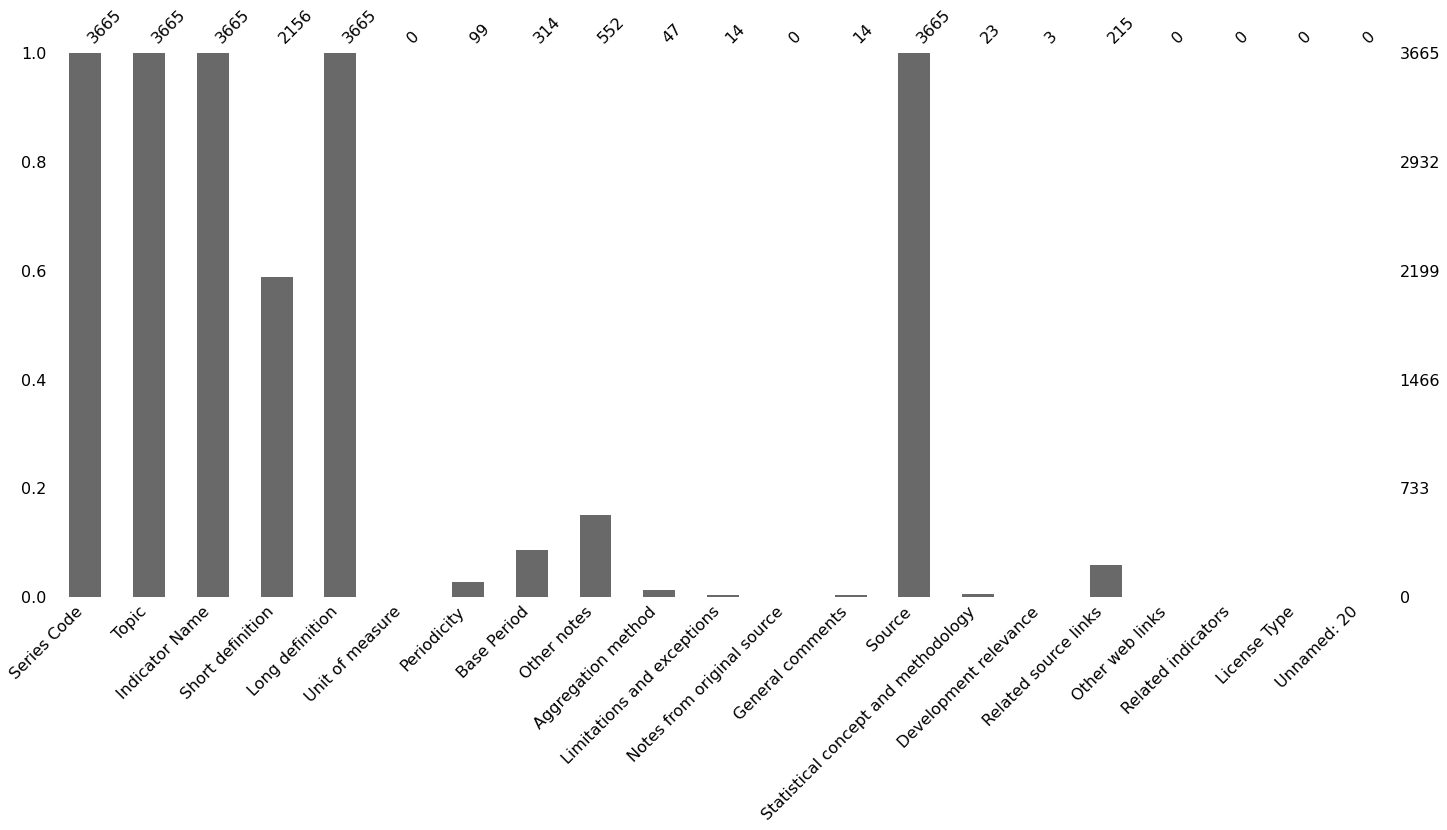

In [19]:
msno.bar(data_s)

In [20]:
data_stat.shape

(886930, 70)

In [21]:
data_stat.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (70).

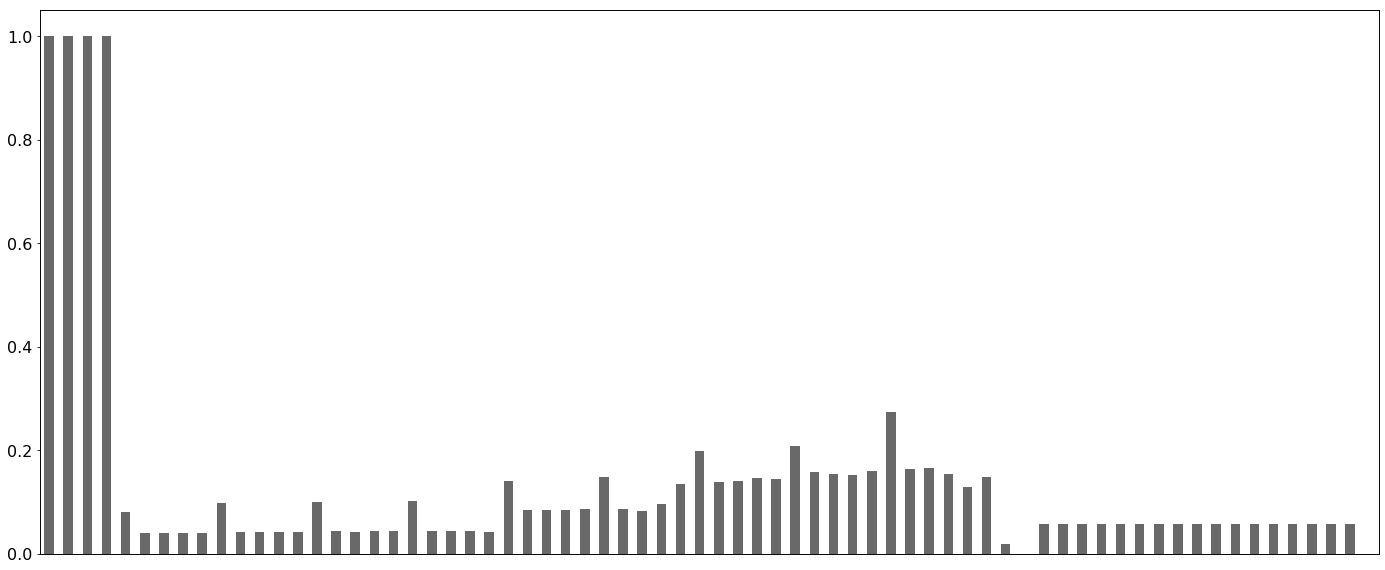

In [22]:
msno.bar(data_stat)

Cette table représente l'historique des mesures effectuées pour chaque indicateur pour chaque pays. la recherche des indicateur va s'effectuer sur cette table. On peut dire que cette table a une clé primaire composée de 2 clés étrangères. (country code, indicator code) et une succession de mesure allant de 1970 à 2100; 

In [23]:
dff=data_stat.drop(columns=['Indicator Name','Country Name', 'Unnamed: 69'])
dff

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARB,SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,ZWE,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,ZWE,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,ZWE,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,ZWE,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dff[dff['Indicator Code']=='PRJ.POP.ALL.3.MF']

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
3656,ARB,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7321,EAS,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10986,EAP,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14651,EMU,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18316,ECS,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872261,VIR,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875926,PSE,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.50,NaN,NaN,NaN,NaN,638.44,NaN,NaN,817.39,1011.85,1223.91,1434.84,1632.52,1813.48,1978.47,2121.42,2233.86,2321.96,2385.48,2422.78,2437.90,2430.89,2401.49,2355.02,2292.81
879591,YEM,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883256,ZMB,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.88,NaN,NaN,NaN,NaN,953.63,NaN,NaN,1266.76,1667.53,2186.53,2828.01,3580.03,4451.57,5434.98,6515.88,7668.04,8882.75,10151.00,11444.86,12725.76,13960.26,15141.61,16229.78,17219.43


In [25]:
indica=dff.melt(id_vars=['Country Code','Indicator Code'], var_name='year', value_name='measure')
indica

,Country Code,Indicator Code,year,measure
0,ARB,UIS.NERA.2,1970,NaN
1,ARB,UIS.NERA.2.F,1970,NaN
2,ARB,UIS.NERA.2.GPI,1970,NaN
3,ARB,UIS.NERA.2.M,1970,NaN
4,ARB,SE.PRM.TENR,1970,54.822121
...,...,...,...,...
57650445,ZWE,UIS.LP.AG15T24.M,2100,NaN
57650446,ZWE,SE.ADT.1524.LT.ZS,2100,NaN
57650447,ZWE,SE.ADT.1524.LT.FE.ZS,2100,NaN
57650448,ZWE,SE.ADT.1524.LT.FM.ZS,2100,NaN


Chaque ligne de cette table représente une mesure donnée faite à une année donnée dans un pays donnée. Mon objectif est d'épurer cette table, pour commencer j'enlève toute les valeurs NaN, 

In [26]:
indica=indica.dropna()
indica

,Country Code,Indicator Code,year,measure
4,ARB,SE.PRM.TENR,1970,54.822121
5,ARB,SE.PRM.TENR.FE,1970,43.351101
6,ARB,UIS.NERA.1.GPI,1970,0.658570
7,ARB,SE.PRM.TENR.MA,1970,65.826233
12,ARB,UIS.NIRA.1,1970,52.448921
...,...,...,...,...
57650437,ZWE,PRJ.POP.ALL.1.MA,2100,59.060000
57650438,ZWE,PRJ.POP.ALL.1.MF,2100,124.170000
57650439,ZWE,PRJ.POP.ALL.3.FE,2100,3175.640000
57650440,ZWE,PRJ.POP.ALL.3.MA,2100,2813.310000


je déviserais ma table en 2, une pour les prévision et l'autre pour des mesures déja faites

In [27]:
indicateur=indica[indica.groupby(['Country Code', 'Indicator Code'])['year'].transform(max) == indica['year']]

In [28]:
indicateur[indicateur['year']=='2100']

,Country Code,Indicator Code,year,measure
56854829,WLD,PRJ.MYS.0T19.FE,2100,2.70
56854830,WLD,PRJ.MYS.0T19.MA,2100,2.70
56854831,WLD,PRJ.MYS.0T19.MF,2100,2.70
56854832,WLD,PRJ.MYS.15UP.FE,2100,12.70
56854833,WLD,PRJ.MYS.15UP.GPI,2100,0.08
...,...,...,...,...
57650437,ZWE,PRJ.POP.ALL.1.MA,2100,59.06
57650438,ZWE,PRJ.POP.ALL.1.MF,2100,124.17
57650439,ZWE,PRJ.POP.ALL.3.FE,2100,3175.64
57650440,ZWE,PRJ.POP.ALL.3.MA,2100,2813.31


In [29]:
indicateur[indicateur['Indicator Code'].str.contains(pat='PRJ')]

,Country Code,Indicator Code,year,measure
56854829,WLD,PRJ.MYS.0T19.FE,2100,2.70
56854830,WLD,PRJ.MYS.0T19.MA,2100,2.70
56854831,WLD,PRJ.MYS.0T19.MF,2100,2.70
56854832,WLD,PRJ.MYS.15UP.FE,2100,12.70
56854833,WLD,PRJ.MYS.15UP.GPI,2100,0.08
...,...,...,...,...
57650437,ZWE,PRJ.POP.ALL.1.MA,2100,59.06
57650438,ZWE,PRJ.POP.ALL.1.MF,2100,124.17
57650439,ZWE,PRJ.POP.ALL.3.FE,2100,3175.64
57650440,ZWE,PRJ.POP.ALL.3.MA,2100,2813.31


On vois que pour les indicateurs prévisionels leurs code contient 'PRJ' on crée une table qui contiens les valeurs projection. et une autre qui contient la dernière mesure.

In [30]:
indicateur_project=indica[indica['Indicator Code'].str.contains(pat='PRJ')]
Indicateur=indicateur[indicateur['year']<'2020']

In [31]:
df=pd.DataFrame(Indicateur.groupby('Indicator Code').size(),columns=['n_country'])
df.reset_index(level=0, inplace=True)
df

,Indicator Code,n_country
0,BAR.NOED.1519.FE.ZS,144
1,BAR.NOED.1519.ZS,144
2,BAR.NOED.15UP.FE.ZS,144
3,BAR.NOED.15UP.ZS,144
4,BAR.NOED.2024.FE.ZS,144
...,...,...
3352,UIS.XUNIT.USCONST.3.FSGOV,127
3353,UIS.XUNIT.USCONST.4.FSGOV,83
3354,UIS.XUNIT.USCONST.56.FSGOV,147
3355,XGDP.23.FSGOV.FDINSTADM.FFD,166


In [32]:
df.describe()

,n_country
count,3357.000000
mean,91.143581
std,74.760294
min,1.000000
25%,16.000000
50%,75.000000
75%,147.000000
max,240.000000


on voit bien que certains indicateurs nous donne une meusure sur un seul pays, et plus de 75% couvrent au maximum 147 pays, je choisis les indicateurs qui couvrent au minimum 150 pays 

In [33]:
df=df[df['n_country']<180]
list_ind=df['Indicator Code'].to_numpy()
for i in list_ind:
    Indicateur=Indicateur[Indicateur['Indicator Code']!=i]
df=pd.DataFrame(Indicateur.groupby('Indicator Code').size(),columns=['n_country'])
df.reset_index(level=0, inplace=True)
df.describe()

,n_country
count,608.000000
mean,203.424342
std,15.643080
min,180.000000
25%,192.000000
50%,195.000000
75%,219.000000
max,240.000000


on a enlevé plus de 80% des indicateurs car j'ai jugé qu'ils ne couvraient pas assez de pays. 

je vais afficher les noms des indicateurs pour avoir une idée.

In [34]:
df_arr=df['Indicator Code'].to_numpy()
df_arr

array(['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.MKTP.CD',
       'NY.GDP.MKTP.KD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.KD',
       'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.MKTP.CD', 'NY.GNP.MKTP.PP.CD',
       'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.PP.CD', 'SE.ADT.1524.LT.FE.ZS',
       'SE.ADT.1524.LT.FM.ZS', 'SE.ADT.1524.LT.MA.ZS',
       'SE.ADT.1524.LT.ZS', 'SE.ADT.LITR.FE.ZS', 'SE.ADT.LITR.MA.ZS',
       'SE.ADT.LITR.ZS', 'SE.COM.DURS', 'SE.ENR.PRIM.FM.ZS',
       'SE.ENR.PRSC.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS',
       'SE.PRE.ENRL', 'SE.PRE.ENRL.FE', 'SE.PRE.ENRL.FE.ZS',
       'SE.PRE.ENRL.TC.ZS', 'SE.PRE.ENRR', 'SE.PRE.ENRR.FE',
       'SE.PRE.ENRR.MA', 'SE.PRE.PRIV.ZS', 'SE.PRE.TCHR',
       'SE.PRE.TCHR.FE', 'SE.PRE.TCHR.FE.ZS', 'SE.PRM.AGES',
       'SE.PRM.CMPT.FE.ZS', 'SE.PRM.CMPT.MA.ZS', 'SE.PRM.CMPT.ZS',
       'SE.PRM.DROP.FE.ZS', 'SE.PRM.DROP.MA.ZS', 'SE.PRM.DROP.ZS',
       'SE.PRM.DURS', 'SE.PRM.ENRL', 'SE

In [35]:
ind_sec=pd.DataFrame()
for i in df_arr:
   # print(i)
    A=data_s[data_s['Series Code']==i]
    ind_sec=ind_sec.append(A,ignore_index=True)
ind_sec

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,Operators have traditionally been the main sou...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,GDP (current US$),NaN,GDP at purchaser's prices is the sum of gross ...,NaN,Annual,NaN,NaN,Gap-filled total,"Gross domestic product (GDP), though widely tr...",NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NY.GDP.MKTP.KD,Economic Policy & Debt: National accounts: US$...,GDP (constant 2010 US$),NaN,GDP at purchaser's prices is the sum of gross ...,NaN,Annual,2010,NaN,Gap-filled total,Each industry's contribution to growth in the ...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,NaN,NaN,Gap-filled total,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,UIS.T.3.F,Teachers,"Teachers in upper secondary education, female ...",NaN,Total number of female teachers in public and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,UIS.TEP.5.B,Tertiary,Percentage of all students in tertiary educati...,NaN,Total enrolment in short-cycle tertiary progra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,UIS.TE_100000.56,Tertiary,"Enrolment in tertiary education per 100,000 in...",NaN,Number of students enrolled in tertiary educat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,UIS.TE_100000.56.F,Tertiary,"Enrolment in tertiary education per 100,000 in...",NaN,Number of female students enrolled in tertiary...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
descrip=ind_sec['Indicator Name'].to_numpy()
for i in descrip:
    print(i)

Personal computers (per 100 people)
Internet users (per 100 people)
GDP (current US$)
GDP (constant 2010 US$)
GDP, PPP (current international $)
GDP, PPP (constant 2011 international $)
GDP per capita (current US$)
GDP per capita (constant 2010 US$)
GDP per capita, PPP (current international $)
GDP per capita, PPP (constant 2011 international $)
GNI (current US$)
GNI, PPP (current international $)
GNI per capita, Atlas method (current US$)
GNI per capita, PPP (current international $)
Youth literacy rate, population 15-24 years, female (%)
Youth literacy rate, population 15-24 years, gender parity index (GPI)
Youth literacy rate, population 15-24 years, male (%)
Youth literacy rate, population 15-24 years, both sexes (%)
Adult literacy rate, population 15+ years, female (%)
Adult literacy rate, population 15+ years, male (%)
Adult literacy rate, population 15+ years, both sexes (%)
Duration of compulsory education (years)
Gross enrolment ratio, primary, gender parity index (GPI)
Gross 

En parcourant la liste, j'ai pu identifier quelques indicateurs qui me semble pertinant, notament :  
Personal computers  
Internet users  
GDP per capita  
Gross enrolment ratio, secondary, both sexes  
Unemployment, total (% of total labor force) (modeled ILO estimate)  
Population, ages 15-24, total  
Population, total    
Percentage of enrolment in upper secondary education in private institutions (%)  
Youth literacy rate, population 15-24 years, both sexes  

In [37]:
ind_name=['Population, total','Population, ages 15-24, total','Youth literacy rate, population 15-24 years, both sexes','Personal computers','Internet users','GDP per capita','Gross enrolment ratio, secondary, both sexes','Unemployment, total','Percentage of enrolment in upper secondary education in private institutions']
ind_code=[]
for i in ind_name:
    indicateur1=ind_sec[ind_sec['Indicator Name'].str.contains(pat=i)]
    ind_code.append(indicateur1.iloc[0,0])
indicateur_final=pd.DataFrame()
for i in ind_code:
    A=indicateur[indicateur['Indicator Code']==i]
    indicateur_final=indicateur_final.append(A,ignore_index=True)
indicateur_final


,Country Code,Indicator Code,year,measure
0,ERI,SP.POP.TOTL,2011,4.474690e+06
1,ARB,SP.POP.TOTL,2013,3.697615e+08
2,EUU,SP.POP.TOTL,2013,5.067393e+08
3,OED,SP.POP.TOTL,2013,1.261604e+09
4,CUW,SP.POP.TOTL,2013,1.535000e+05
...,...,...,...,...
1918,GHA,UIS.PRP.3,2015,8.057320e+00
1919,KAZ,UIS.PRP.3,2015,1.802058e+01
1920,MNE,UIS.PRP.3,2015,2.758500e-01
1921,STP,UIS.PRP.3,2015,1.343000e+00


In [38]:
ind_code

['SP.POP.TOTL',
 'SP.POP.1524.TO.UN',
 'SE.ADT.1524.LT.ZS',
 'IT.CMP.PCMP.P2',
 'IT.NET.USER.P2',
 'NY.GDP.PCAP.CD',
 'SE.SEC.ENRR',
 'SL.UEM.TOTL.ZS',
 'UIS.PRP.3']

Pour préparer mon tableau, je change les codes des indicateurs pour que ca soit plus visible

In [39]:
indicateur_final=indicateur_final.replace('SP.POP.TOTL','Total Population')
indicateur_final=indicateur_final.replace('SP.POP.1524.TO.UN','Youth Population')
indicateur_final=indicateur_final.replace('SE.ADT.1524.LT.ZS','Youth literacy')
indicateur_final=indicateur_final.replace('IT.CMP.PCMP.P2','Personal computers')
indicateur_final=indicateur_final.replace('IT.NET.USER.P2','Internet User')
indicateur_final=indicateur_final.replace('NY.GDP.PCAP.CD','GPD per Capita')
indicateur_final=indicateur_final.replace('SE.SEC.ENRR','Gross Enrolement Secondary')
indicateur_final=indicateur_final.replace('SL.UEM.TOTL.ZS','Unemployement Rate')
indicateur_final=indicateur_final.replace('UIS.PRP.3','Private Education secondary')
indicateur_final[['measure','year']]=indicateur_final[['measure','year']].astype(float)
indicateur_final

,Country Code,Indicator Code,year,measure
0,ERI,Total Population,2011.0,4.474690e+06
1,ARB,Total Population,2013.0,3.697615e+08
2,EUU,Total Population,2013.0,5.067393e+08
3,OED,Total Population,2013.0,1.261604e+09
4,CUW,Total Population,2013.0,1.535000e+05
...,...,...,...,...
1918,GHA,Private Education secondary,2015.0,8.057320e+00
1919,KAZ,Private Education secondary,2015.0,1.802058e+01
1920,MNE,Private Education secondary,2015.0,2.758500e-01
1921,STP,Private Education secondary,2015.0,1.343000e+00


In [40]:
table=indicateur_final.pivot(index=["Country Code"], columns=["Indicator Code"],values=["measure","year"])

In [41]:
table.reset_index().columns

MultiIndex([('Country Code',                            ''),
            (     'measure',              'GPD per Capita'),
            (     'measure',  'Gross Enrolement Secondary'),
            (     'measure',               'Internet User'),
            (     'measure',          'Personal computers'),
            (     'measure', 'Private Education secondary'),
            (     'measure',            'Total Population'),
            (     'measure',          'Unemployement Rate'),
            (     'measure',            'Youth Population'),
            (     'measure',              'Youth literacy'),
            (        'year',              'GPD per Capita'),
            (        'year',  'Gross Enrolement Secondary'),
            (        'year',               'Internet User'),
            (        'year',          'Personal computers'),
            (        'year', 'Private Education secondary'),
            (        'year',            'Total Population'),
            (        'ye

on se retrouve avec une table qui a des colonnes multi-indexé

In [42]:
table.columns=[" ".join(a) for a in table.columns.to_flat_index()]

In [43]:
table.describe()

,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
count,234.000000,223.000000,233.000000,218.000000,188.000000,2.400000e+02,211.000000,1.920000e+02,184.000000,234.000000,223.000000,233.000000,218.000000,188.000000,240.000000,211.000000,192.000000,184.000000
mean,15877.579276,80.915707,50.112632,17.258604,22.330233,2.094884e+08,8.513168,6.274290e+06,88.770548,2015.542735,2013.282511,2015.532189,2005.688073,2012.606383,2015.891667,2015.957346,2014.447917,2009.788043
std,23736.784169,28.731277,28.359197,22.332817,20.892378,8.119465e+08,6.050066,2.338922e+07,16.383599,1.954496,4.258115,3.072408,1.710349,2.996319,0.597006,0.356010,2.255278,8.258373
min,285.727442,7.353040,0.000000,0.022211,0.275850,1.109700e+04,0.200000,2.825000e+03,23.523780,2000.000000,1983.000000,1990.000000,1994.000000,1999.000000,2011.000000,2013.000000,2003.000000,1970.000000
25%,2063.235277,59.214270,25.246250,2.320563,6.268032,1.304528e+06,4.700000,2.945968e+05,84.931420,2016.000000,2014.000000,2016.000000,2005.000000,2013.000000,2016.000000,2016.000000,2015.000000,2010.000000
50%,5964.573900,86.460983,52.481808,7.630833,16.960290,8.741154e+06,6.500000,1.158544e+06,97.928251,2016.000000,2015.000000,2016.000000,2006.000000,2014.000000,2016.000000,2016.000000,2015.000000,2012.000000
75%,18351.496141,100.210880,75.497623,20.773356,30.062746,3.835572e+07,10.910027,4.519916e+06,99.237583,2016.000000,2015.000000,2016.000000,2006.000000,2014.000000,2016.000000,2016.000000,2015.000000,2014.000000
max,168146.015281,166.808472,98.240016,96.170657,94.908440,7.442136e+09,31.400000,2.441202e+08,100.000000,2016.000000,2016.000000,2016.000000,2009.000000,2015.000000,2016.000000,2016.000000,2015.000000,2016.000000


In [44]:
data_final=data_final.join(table, on='Country Code')

In [45]:
data_final[data_final['Country Name'].str.contains('rkey')]

,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
Country Code,,,,,,,,,,,,,,,,,,,,
TUR,Turkey,Europe & Central Asia,10862.600399,102.488762,58.347734,6.411533,3.13605,79512426.0,10.8,13930222.0,99.49439,2016.0,2015.0,2016.0,2006.0,2013.0,2016.0,2016.0,2015.0,2015.0


dans ce tableau on voit qu'il y a 241 pays, alors que normalement le nombre devrait être au alentour de 200

In [46]:
data_final['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

on voit qu'il existe des lignes dans la liste qui n'ont pas de région affiliée 

In [47]:
data_final[data_final['Region'].isna()]

,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
Country Code,,,,,,,,,,,,,,,,,,,,
ARB,Arab World,NaN,7715.998677,70.735046,36.868602,6.676681,NaN,3.697615e+08,11.413681,NaN,88.964699,2013.0,2014.0,2013.0,2006.0,NaN,2013.0,2013.0,NaN,2014.0
EAP,East Asia & Pacific,NaN,6586.833593,86.460983,48.386621,5.495883,NaN,2.051431e+09,4.353152,NaN,98.969109,2016.0,2014.0,2016.0,2006.0,NaN,2016.0,2016.0,NaN,2014.0
EAS,East Asia & Pacific (all income levels),NaN,9787.775545,87.934822,52.796321,7.953008,NaN,2.296786e+09,4.275369,NaN,99.004402,2016.0,2014.0,2016.0,2006.0,NaN,2016.0,2016.0,NaN,2014.0
ECA,Europe & Central Asia,NaN,7167.338947,98.392288,63.672750,9.736540,NaN,4.174246e+08,7.709587,NaN,99.626114,2016.0,2014.0,2016.0,2006.0,NaN,2016.0,2016.0,NaN,2014.0
ECS,Europe & Central Asia (all income levels),NaN,22230.203651,105.963516,73.914751,34.330533,NaN,9.119953e+08,8.133421,NaN,99.711449,2016.0,2014.0,2016.0,2006.0,NaN,2016.0,2016.0,NaN,2014.0
EMU,Euro area,NaN,35008.049004,111.419662,80.446726,54.939223,NaN,3.408946e+08,10.002749,NaN,NaN,2016.0,2014.0,2016.0,2006.0,NaN,2016.0,2016.0,NaN,NaN
EUU,European Union,NaN,35438.487900,112.793739,75.497623,52.911759,NaN,5.067393e+08,10.920054,NaN,NaN,2013.0,2014.0,2013.0,2006.0,NaN,2013.0,2013.0,NaN,NaN
GIB,Gibraltar,NaN,NaN,NaN,94.444472,54.842602,2.35732,3.440800e+04,NaN,NaN,NaN,NaN,NaN,2016.0,2000.0,2009.0,2016.0,NaN,NaN,NaN
HIC,High income,NaN,40803.582000,106.634560,81.967715,64.733493,NaN,1.190029e+09,6.206290,NaN,NaN,2016.0,2015.0,2016.0,2006.0,NaN,2016.0,2016.0,NaN,NaN


ces lignes-là représente des régions ou des groupes de pays. 

In [48]:
data_group=data_final[data_final['Region'].isna()]

In [49]:
data_final=data_final[data_final['Region'].notna()]

In [50]:
data_final[data_final['Region']=='North America']['measure Youth literacy']=100
data_final[data_final['Region']=='North America']

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_23658/972821825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final[data_final['Region']=='North America']['measure Youth literacy']=100


,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
Country Code,,,,,,,,,,,,,,,,,,,,
BMU,Bermuda,North America,85748.065414,71.542412,98.000000,22.296631,40.03656,65331.0,NaN,7102.0,NaN,2013.0,2015.0,2016.0,2004.0,2014.0,2016.0,NaN,2005.0,NaN
CAN,Canada,North America,42157.927991,109.931549,89.840000,94.446705,6.02197,36286425.0,7.0,4373511.0,NaN,2016.0,2013.0,2016.0,2006.0,2013.0,2016.0,2016.0,2015.0,NaN
USA,United States,North America,57638.159088,97.564690,76.176737,79.915488,7.97624,323127513.0,4.9,45147517.0,NaN,2016.0,2014.0,2016.0,2006.0,2014.0,2016.0,2016.0,2015.0,NaN


In [51]:
data_final

,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
Country Code,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Latin America & Caribbean,25324.720362,111.174522,93.542454,9.917683,93.864899,104822.0,NaN,14455.0,99.138410,2011.0,2012.0,2016.0,2006.0,2012.0,2016.0,NaN,2015.0,2010.0
AFG,Afghanistan,South Asia,561.778746,55.644409,10.595726,0.390148,1.617100,34656032.0,8.600000,7252785.0,46.990050,2016.0,2015.0,2016.0,2006.0,2014.0,2016.0,2016.0,2015.0,2011.0
AGO,Angola,Sub-Saharan Africa,3308.700233,28.898720,13.000000,0.646019,10.534380,28813463.0,6.100000,4259352.0,77.431130,2016.0,2011.0,2016.0,2006.0,2011.0,2016.0,2016.0,2015.0,2014.0
ALB,Albania,Europe & Central Asia,4124.982390,95.765488,66.363445,4.593538,11.941130,2876101.0,15.200000,556269.0,99.231400,2016.0,2015.0,2016.0,2008.0,2014.0,2016.0,2016.0,2015.0,2012.0
AND,Andorra,Europe & Central Asia,36988.622030,49.391441,97.930637,NaN,2.872670,77281.0,NaN,8715.0,100.000000,2016.0,1983.0,2016.0,NaN,2014.0,2016.0,NaN,2006.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,Europe & Central Asia,3661.429847,NaN,NaN,NaN,NaN,1816200.0,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN
YEM,"Yemen, Rep.",Middle East & North Africa,990.334774,48.624660,24.579208,2.903922,3.692110,27584213.0,16.200001,5995687.0,60.222141,2016.0,2013.0,2016.0,2006.0,2013.0,2016.0,2016.0,2015.0,1994.0
ZAF,South Africa,Sub-Saharan Africa,5284.603604,98.819672,54.000000,8.222196,6.204320,55908865.0,26.700001,9998431.0,98.955780,2016.0,2014.0,2016.0,2005.0,2014.0,2016.0,2016.0,2015.0,2015.0


In [52]:
data_final.describe()

,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
count,209.000000,196.000000,207.000000,192.000000,187.000000,2.140000e+02,186.000000,1.920000e+02,164.000000,209.000000,196.000000,207.000000,192.000000,187.000000,214.000000,186.0,192.000000,164.000000
mean,16233.024214,80.999779,50.195395,16.933065,22.437040,3.465947e+07,8.689247,6.274290e+06,88.866980,2015.531100,2013.147959,2015.516908,2005.708333,2012.625668,2015.920561,2016.0,2014.447917,2009.274390
std,24543.201303,29.483183,28.959319,22.086814,20.896938,1.353458e+08,6.366109,2.338922e+07,16.916734,2.040513,4.523845,3.242385,1.765977,2.992640,0.529193,0.0,2.255278,8.609687
min,285.727442,7.353040,0.000000,0.022211,0.275850,1.109700e+04,0.200000,2.825000e+03,23.523780,2000.000000,1983.000000,1990.000000,1994.000000,1999.000000,2011.000000,2016.0,2003.000000,1970.000000
25%,2058.035209,57.741473,25.036652,2.206629,6.300875,9.096532e+05,4.450000,2.945968e+05,85.534490,2016.000000,2013.750000,2016.000000,2005.000000,2013.000000,2016.000000,2016.0,2015.000000,2009.000000
50%,5805.605385,87.515373,53.200000,7.829152,17.111210,6.318988e+06,6.550000,1.158544e+06,98.120830,2016.000000,2015.000000,2016.000000,2006.000000,2014.000000,2016.000000,2016.0,2015.000000,2011.000000
75%,18491.940112,100.527466,76.005180,20.387328,30.217441,2.363174e+07,11.375000,4.519916e+06,99.276285,2016.000000,2015.000000,2016.000000,2007.000000,2014.000000,2016.000000,2016.0,2015.000000,2014.000000
max,168146.015281,166.808472,98.240016,96.170657,94.908440,1.378665e+09,31.400000,2.441202e+08,100.000000,2016.000000,2016.000000,2016.000000,2009.000000,2015.000000,2016.000000,2016.0,2015.000000,2016.000000


on va regrouper les pays par région

In [53]:
data_final.dtypes

Country Name                            object
Region                                  object
measure GPD per Capita                 float64
measure Gross Enrolement Secondary     float64
measure Internet User                  float64
measure Personal computers             float64
measure Private Education secondary    float64
measure Total Population               float64
measure Unemployement Rate             float64
measure Youth Population               float64
measure Youth literacy                 float64
year GPD per Capita                    float64
year Gross Enrolement Secondary        float64
year Internet User                     float64
year Personal computers                float64
year Private Education secondary       float64
year Total Population                  float64
year Unemployement Rate                float64
year Youth Population                  float64
year Youth literacy                    float64
dtype: object

In [54]:

data_region = data_final.groupby('Region', as_index=False).agg(Total_Population=('measure Total Population','sum'), 
                                                               Youth_population= ('measure Youth Population','sum'), 
                                                               private_secondary_enrollement=('measure Private Education secondary','mean'),
                                                               gross_enrolment_secondary=('measure Gross Enrolement Secondary','mean'),
                                                               internet_user=('measure Internet User','mean'),
                                                               personal_computer=('measure Personal computers','mean'),
                                                               unemployment_ratio=('measure Unemployement Rate','mean'),
                                                               GDP_capita=('measure GPD per Capita','mean'),
                                                               youth_leteracy=('measure Youth literacy','mean'))

In [55]:
data_region.insert(1,"code",['EAPA','EUCA','LACA','MENA','NOAM','SOAS','SSAF'])
data_region

,Region,code,Total_Population,Youth_population,private_secondary_enrollement,gross_enrolment_secondary,internet_user,personal_computer,unemployment_ratio,GDP_capita,youth_leteracy
0,East Asia & Pacific,EAPA,2.273265e+09,333981307.0,26.650587,84.566346,45.638807,18.879208,5.837931,15374.736216,94.046465
1,Europe & Central Asia,EUCA,9.119609e+08,108040216.0,12.034573,105.973190,74.319663,32.729266,9.391837,31578.347290,99.599351
2,Latin America & Caribbean,LACA,6.376263e+08,106567059.0,30.480317,89.353380,54.523335,10.227111,8.845161,12240.898510,96.393821
3,Middle East & North Africa,MENA,4.367207e+08,74130683.0,16.873276,82.880342,57.957443,15.602573,10.423810,13990.017098,92.914197
4,North America,NOAM,3.594793e+08,49528130.0,18.011590,93.012884,88.005579,65.552941,5.950000,61848.050831,NaN
5,South Asia,SOAS,1.766383e+09,334872503.0,31.049289,70.122135,28.313673,4.052155,4.587500,2816.237498,83.459350
6,Sub-Saharan Africa,SSAF,1.031692e+09,197543832.0,26.120011,46.730877,20.312099,3.469602,9.673913,2080.059192,72.692007


on regroupe les régions et on calcule une moyenne non pondérée

[Text(0.5, 0, 'Region')]

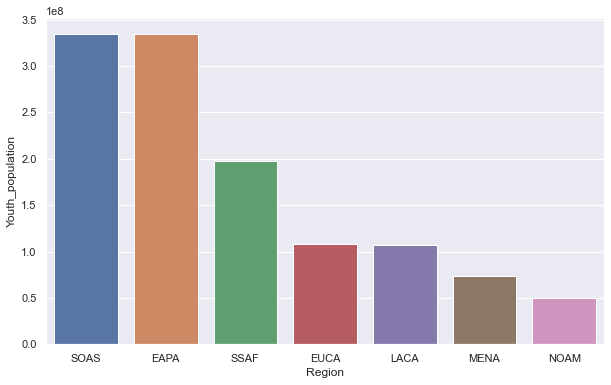

In [56]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,6)})
xa=data_region.sort_values(by="Youth_population",ascending=False)
ax=sns.barplot(x="code",y="Youth_population", data=xa)
ax.set(xlabel='Region')
#'Youth_population','private_secondary_enrollement', 'gross_enrolment_secondary',
#       'internet_user', 'unemployment_ratio', 'youth_leteracy'

[Text(0.5, 0, 'Region')]

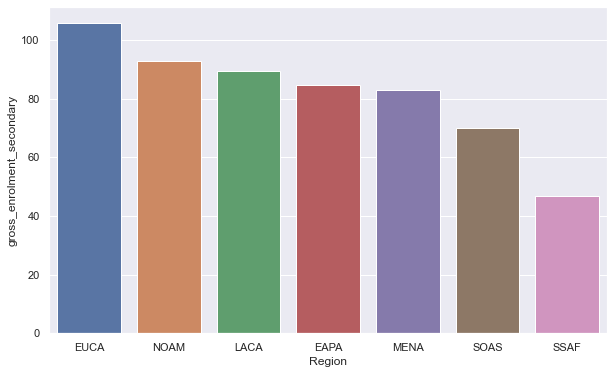

In [57]:
xb=data_region.sort_values(by="gross_enrolment_secondary",ascending=False)
bx=sns.barplot(x="code",y="gross_enrolment_secondary", data=xb)
bx.set(xlabel='Region')

[Text(0.5, 0, 'Region')]

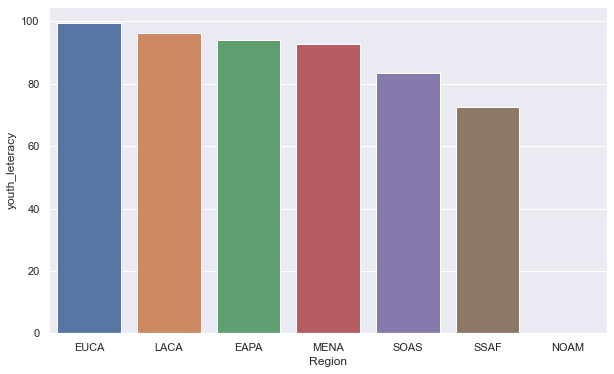

In [58]:
xb=data_region.sort_values(by="youth_leteracy",ascending=False)
bx=sns.barplot(x="code",y="youth_leteracy", data=xb)
bx.set(xlabel='Region')

[Text(0.5, 0, 'Region')]

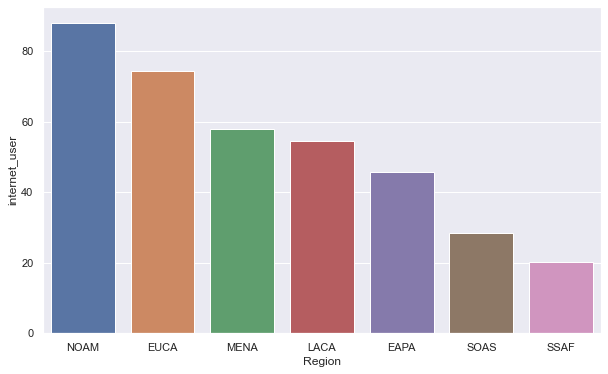

In [59]:
xc=data_region.sort_values(by="internet_user",ascending=False)
cx=sns.barplot(x="code",y="internet_user", data=xc)
cx.set(xlabel='Region')

[Text(0.5, 0, 'Region')]

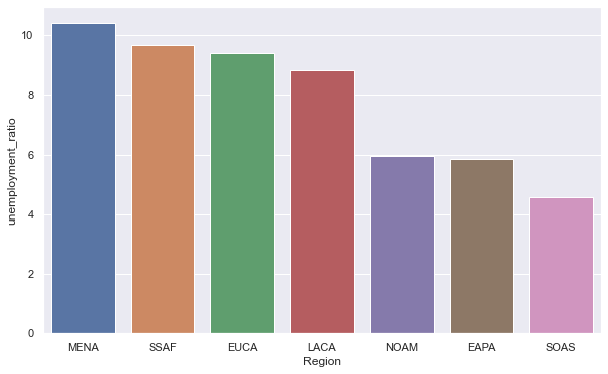

In [60]:
xc=data_region.sort_values(by="unemployment_ratio",ascending=False)
cx=sns.barplot(x="code",y="unemployment_ratio", data=xc)
cx.set(xlabel='Region')

[Text(0.5, 0, 'Region')]

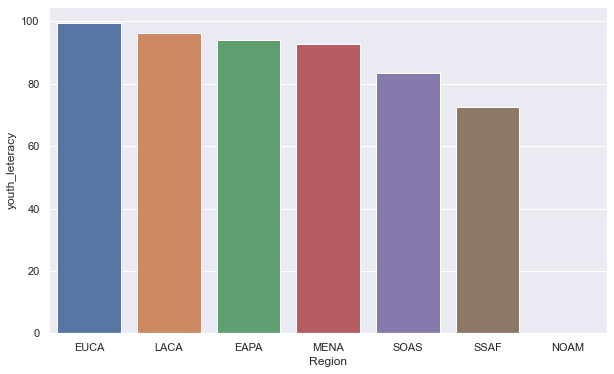

In [61]:
xd=data_region.sort_values(by="youth_leteracy",ascending=False)
dx=sns.barplot(x="code",y="youth_leteracy", data=xd)
dx.set(xlabel='Region')

In [62]:
data_region.columns

Index(['Region', 'code', 'Total_Population', 'Youth_population',
       'private_secondary_enrollement', 'gross_enrolment_secondary',
       'internet_user', 'personal_computer', 'unemployment_ratio',
       'GDP_capita', 'youth_leteracy'],
      dtype='object')

In [63]:
liste=['Youth_population','private_secondary_enrollement', 'gross_enrolment_secondary',
       'internet_user', 'unemployment_ratio', 'youth_leteracy']

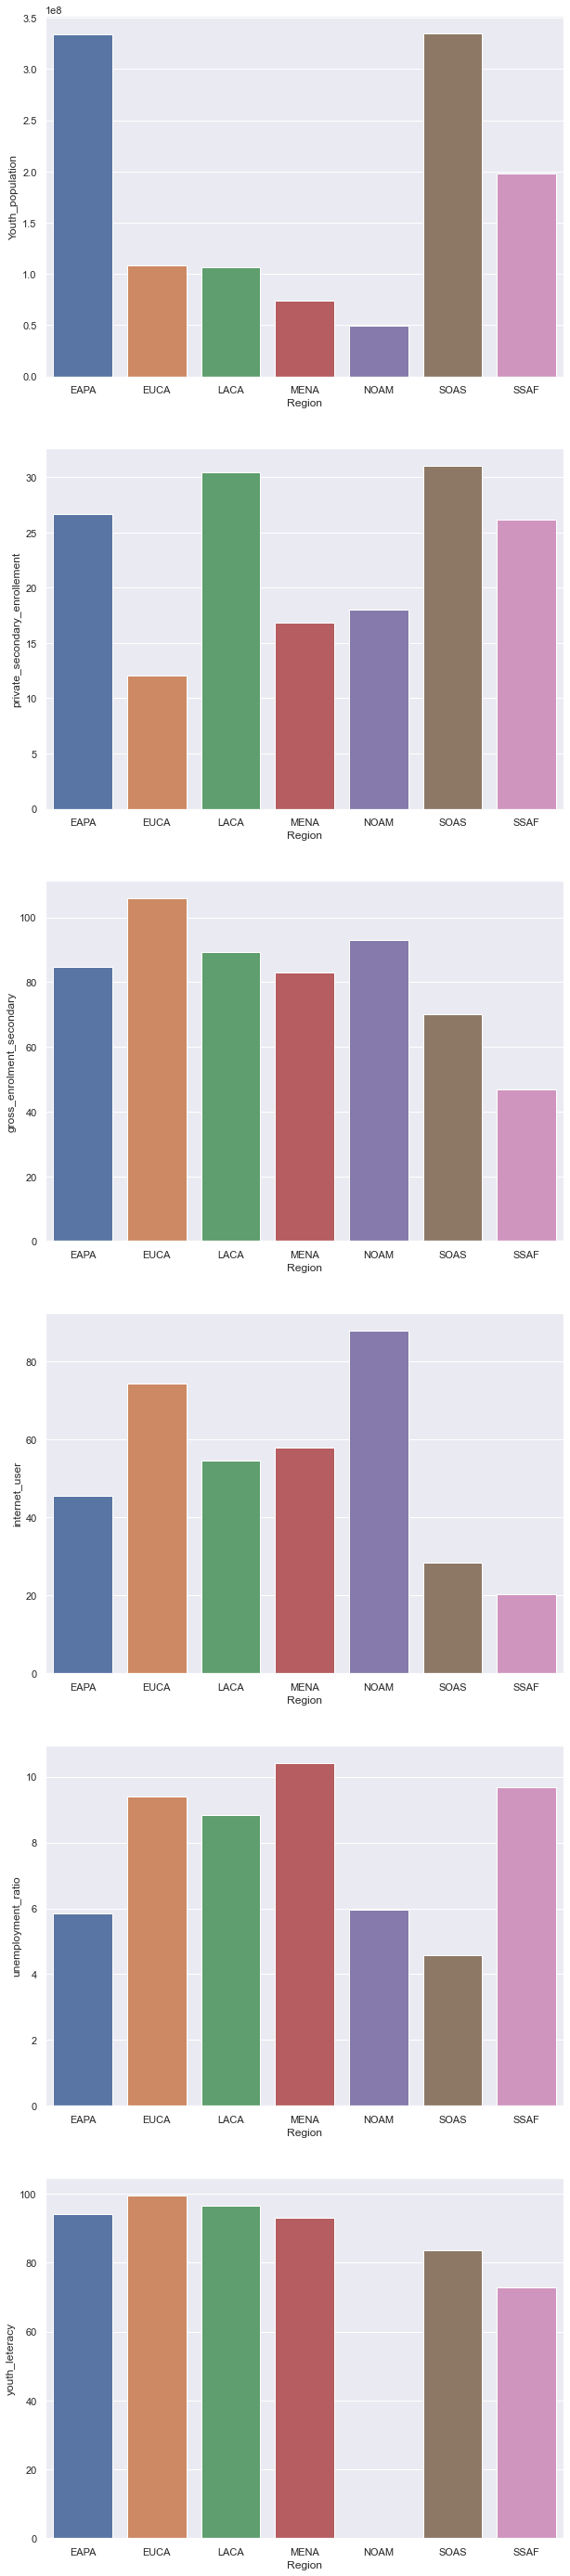

In [64]:
fig, axes = plt.subplots(6, 1, figsize=(10, 50))

j=0
k=0
for i in liste :
    sns.barplot(ax=axes[k], x="code",y=i, data=data_region)
    axes[k].set(xlabel='Region')
    k+=1
    if(j==3):
        j=0
        k+=1


<AxesSubplot:ylabel='measure Youth Population'>

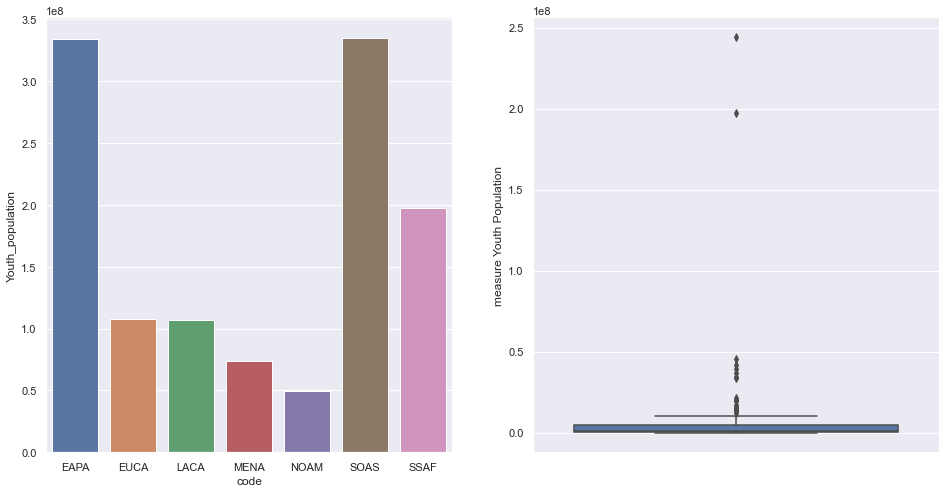

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(ax=axes[0], x="code",y='Youth_population', data=data_region)
sns.boxplot(ax=axes[1],y="measure Youth Population", data=data_final)

In [1]:
sns.set(rc={'figure.figsize':(9.7,6.27)})
bp=sns.boxplot(x="Region",y="measure Internet User", data=data_final)
plt.xticks(rotation= 45)

NameError: name 'sns' is not defined

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Latin America & Caribbean'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'Sub-Saharan Africa'),
  Text(3, 0, 'Europe & Central Asia'),
  Text(4, 0, 'Middle East & North Africa'),
  Text(5, 0, 'East Asia & Pacific'),
  Text(6, 0, 'North America')])

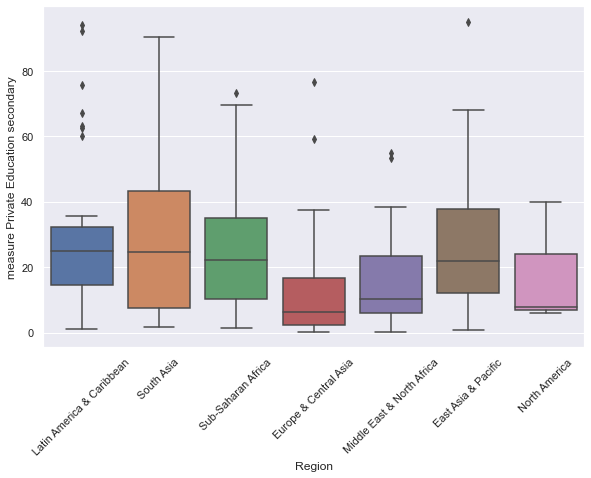

In [67]:

bp1=sns.boxplot(x="Region",y="measure Private Education secondary", data=data_final)
plt.xticks(rotation= 45)

In [68]:
data_final[data_final['Country Name'].str.contains('ussia')]

,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
Country Code,,,,,,,,,,,,,,,,,,,,
RUS,Russian Federation,Europe & Central Asia,8748.364504,104.483131,76.409085,13.220608,2.41016,144342396.0,5.5,14661984.0,99.7096,2016.0,2015.0,2016.0,2006.0,2014.0,2016.0,2016.0,2015.0,2010.0


In [69]:
data_final.describe()

,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy
count,209.000000,196.000000,207.000000,192.000000,187.000000,2.140000e+02,186.000000,1.920000e+02,164.000000,209.000000,196.000000,207.000000,192.000000,187.000000,214.000000,186.0,192.000000,164.000000
mean,16233.024214,80.999779,50.195395,16.933065,22.437040,3.465947e+07,8.689247,6.274290e+06,88.866980,2015.531100,2013.147959,2015.516908,2005.708333,2012.625668,2015.920561,2016.0,2014.447917,2009.274390
std,24543.201303,29.483183,28.959319,22.086814,20.896938,1.353458e+08,6.366109,2.338922e+07,16.916734,2.040513,4.523845,3.242385,1.765977,2.992640,0.529193,0.0,2.255278,8.609687
min,285.727442,7.353040,0.000000,0.022211,0.275850,1.109700e+04,0.200000,2.825000e+03,23.523780,2000.000000,1983.000000,1990.000000,1994.000000,1999.000000,2011.000000,2016.0,2003.000000,1970.000000
25%,2058.035209,57.741473,25.036652,2.206629,6.300875,9.096532e+05,4.450000,2.945968e+05,85.534490,2016.000000,2013.750000,2016.000000,2005.000000,2013.000000,2016.000000,2016.0,2015.000000,2009.000000
50%,5805.605385,87.515373,53.200000,7.829152,17.111210,6.318988e+06,6.550000,1.158544e+06,98.120830,2016.000000,2015.000000,2016.000000,2006.000000,2014.000000,2016.000000,2016.0,2015.000000,2011.000000
75%,18491.940112,100.527466,76.005180,20.387328,30.217441,2.363174e+07,11.375000,4.519916e+06,99.276285,2016.000000,2015.000000,2016.000000,2007.000000,2014.000000,2016.000000,2016.0,2015.000000,2014.000000
max,168146.015281,166.808472,98.240016,96.170657,94.908440,1.378665e+09,31.400000,2.441202e+08,100.000000,2016.000000,2016.000000,2016.000000,2009.000000,2015.000000,2016.000000,2016.0,2015.000000,2016.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Latin America & Caribbean'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'Sub-Saharan Africa'),
  Text(3, 0, 'Europe & Central Asia'),
  Text(4, 0, 'Middle East & North Africa'),
  Text(5, 0, 'East Asia & Pacific'),
  Text(6, 0, 'North America')])

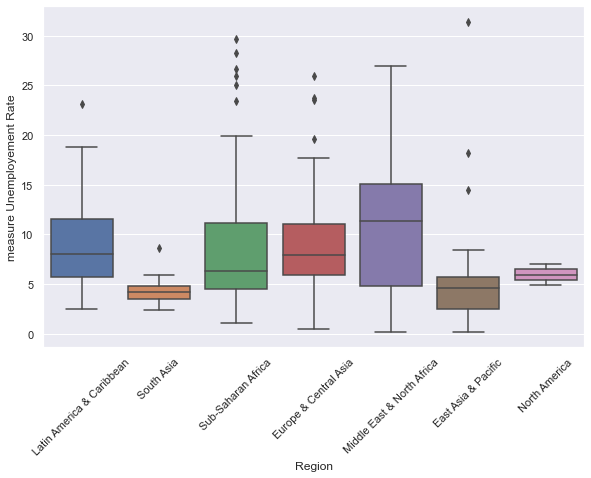

In [70]:
sns.set(rc={'figure.figsize':(9.7,6.27)})
bp=sns.boxplot(x="Region",y="measure Unemployement Rate", data=data_final)
plt.xticks(rotation= 45)

la région MENA 

In [71]:
data_final['youth rate']=data_final['measure Youth Population']/data_final['measure Total Population']*100

In [72]:
data_final['youth rate']

Country Code
ABW    13.790044
AFG    20.927915
AGO    14.782506
ALB    19.341080
AND    11.277028
         ...    
XKX          NaN
YEM    21.735936
ZAF    17.883445
ZMB    18.491784
ZWE    20.641742
Name: youth rate, Length: 214, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Latin America & Caribbean'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'Sub-Saharan Africa'),
  Text(3, 0, 'Europe & Central Asia'),
  Text(4, 0, 'Middle East & North Africa'),
  Text(5, 0, 'East Asia & Pacific'),
  Text(6, 0, 'North America')])

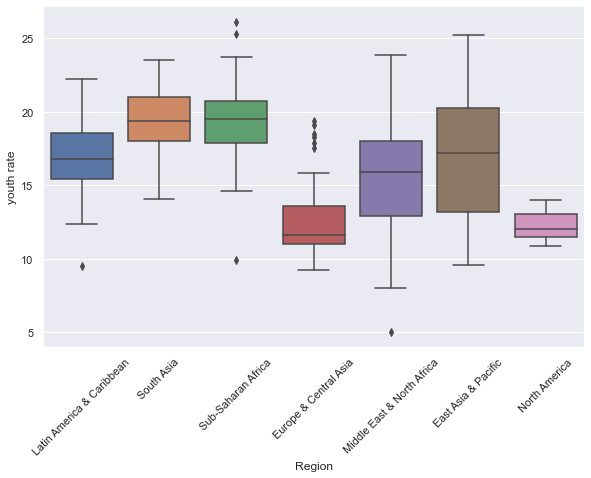

In [73]:
sns.set(rc={'figure.figsize':(9.7,6.27)})
bp=sns.boxplot(x="Region",y="youth rate", data=data_final)
plt.xticks(rotation= 45)

<AxesSubplot:>

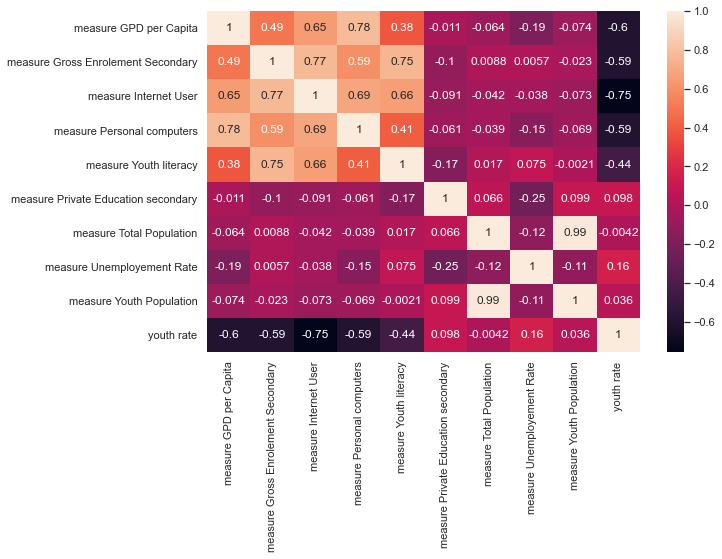

In [74]:
sns.heatmap(data_final[["measure GPD per Capita",
                        "measure Gross Enrolement Secondary",
                        "measure Internet User",
                        "measure Personal computers",
                        "measure Youth literacy",
                        "measure Private Education secondary",
                        "measure Total Population",
                        "measure Unemployement Rate",
                        "measure Youth Population",
                        "youth rate"]].corr(), annot=True)




on remarque que dans les indicateurs choisis, il y a ceux qui sont corrélé et d'autres qui sont inversement corrélé ou qui sont totalement décorrélé. pour le choix des zones il faut choisir un compromis entre les indicateurs 

In [75]:
indicateur_project

,Country Code,Indicator Code,year,measure
35568509,WLD,PRJ.MYS.0T19.FE,2010,2.00
35568510,WLD,PRJ.MYS.0T19.MA,2010,2.00
35568511,WLD,PRJ.MYS.0T19.MF,2010,2.00
35568512,WLD,PRJ.MYS.15UP.FE,2010,7.60
35568513,WLD,PRJ.MYS.15UP.GPI,2010,0.89
...,...,...,...,...
57650437,ZWE,PRJ.POP.ALL.1.MA,2100,59.06
57650438,ZWE,PRJ.POP.ALL.1.MF,2100,124.17
57650439,ZWE,PRJ.POP.ALL.3.FE,2100,3175.64
57650440,ZWE,PRJ.POP.ALL.3.MA,2100,2813.31


c'est la liste des mesures des indicateurs de projection aprés le choix des pays

In [76]:
proj_arr=indicateur_project['Indicator Code'].unique()

In [77]:
ind_prooj=pd.DataFrame()
for i in proj_arr:
   # print(i)
    A=data_s[data_s['Series Code']==i]
    ind_prooj=ind_prooj.append(A,ignore_index=True)
ind_prooj

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,PRJ.MYS.0T19.FE,Attainment,Projection: Mean years of schooling. Age 0-19....,NaN,Mean number of years spent in school by age gr...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PRJ.MYS.0T19.MA,Attainment,Projection: Mean years of schooling. Age 0-19....,NaN,Mean number of years spent in school by age gr...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRJ.MYS.0T19.MF,Attainment,Projection: Mean years of schooling. Age 0-19....,NaN,Mean number of years spent in school by age gr...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRJ.MYS.15UP.FE,Attainment,Projection: Mean years of schooling. Age 15+. ...,NaN,Mean number of years spent in school by age gr...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRJ.MYS.15UP.GPI,Attainment,Projection: Mean Years of Schooling. Age 15+. ...,NaN,The difference between male and female mean nu...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,PRJ.POP.ALL.1.MA,Attainment,Projection: Population in thousands by highest...,NaN,Total population in thousands that has complet...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,PRJ.POP.ALL.1.MF,Attainment,Projection: Population in thousands by highest...,NaN,Total population in thousands that has complet...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,PRJ.POP.ALL.3.FE,Attainment,Projection: Population in thousands by highest...,NaN,Total population in thousands that has complet...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,PRJ.POP.ALL.3.MA,Attainment,Projection: Population in thousands by highest...,NaN,Total population in thousands that has complet...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
descrip=ind_prooj['Indicator Name'].to_numpy()
for i in descrip:
    print(i)

Projection: Mean years of schooling. Age 0-19. Female
Projection: Mean years of schooling. Age 0-19. Male
Projection: Mean years of schooling. Age 0-19. Total
Projection: Mean years of schooling. Age 15+. Female
Projection: Mean Years of Schooling. Age 15+. Gender Gap
Projection: Mean years of schooling. Age 15+. Male
Projection: Mean years of schooling. Age 15+. Total
Projection: Mean years of schooling. Age 15-19. Female
Projection: Mean years of schooling. Age 15-19. Male
Projection: Mean years of schooling. Age 15-19. Total
Projection: Mean years of schooling. Age 20-24. Female
Projection: Mean years of schooling. Age 20-24. Male
Projection: Mean years of schooling. Age 20-24. Total
Projection: Mean years of schooling. Age 20-39. Female
Projection: Mean years of schooling. Age 20-39. Male
Projection: Mean years of schooling. Age 20-39. Total
Projection: Mean years of schooling. Age 20-64. Female
Projection: Mean years of schooling. Age 20-64. Male
Projection: Mean years of schoolin

Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total  
Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total  
Projection: Population age 15-19 in thousands by highest level of educational attainment. Primary. Total  
Projection: Mean years of schooling. Age 0-19. Total  
Projection: Mean years of schooling. Age 20-24. Total  
Projection: Mean years of schooling. Age 20-39. Total


In [79]:
ind_names=['20-24 in thousands by highest level of educational attainment. Upper Secondary. Total',
           '20-24 in thousands by highest level of educational attainment. Post Secondary. Tota',
           'Projection: Mean years of schooling. Age 0-19. Total',
           'Projection: Mean years of schooling. Age 20-39. Total']
ind_codes=[]
for i in ind_names:
    indicateur2=ind_prooj[ind_prooj['Indicator Name'].str.contains(pat=i)]
    ind_codes.append(indicateur2.iloc[0,0])
indicateur_final_p=pd.DataFrame()
for i in ind_codes:
    A=indicateur_project[indicateur_project['Indicator Code']==i]
    indicateur_final_p=indicateur_final_p.append(A,ignore_index=True)
indicateur_final_p

,Country Code,Indicator Code,year,measure
0,WLD,PRJ.POP.2024.3.MF,2010,208591.78
1,ALB,PRJ.POP.2024.3.MF,2010,109.88
2,DZA,PRJ.POP.2024.3.MF,2010,1102.79
3,ARG,PRJ.POP.2024.3.MF,2010,1672.05
4,ARM,PRJ.POP.2024.3.MF,2010,224.89
...,...,...,...,...
12687,VEN,PRJ.MYS.2039.MF,2100,13.40
12688,VNM,PRJ.MYS.2039.MF,2100,12.80
12689,PSE,PRJ.MYS.2039.MF,2100,14.30
12690,ZMB,PRJ.MYS.2039.MF,2100,12.40


In [80]:
ind_codes

['PRJ.POP.2024.3.MF',
 'PRJ.POP.2024.4.MF',
 'PRJ.MYS.0T19.MF',
 'PRJ.MYS.2039.MF']

In [81]:
indicateur_final_p[(indicateur_final_p['Country Code']=='DZA')&(indicateur_final_p['Indicator Code']=='PRJ.MYS.2039.MF')]



,Country Code,Indicator Code,year,measure
9521,DZA,PRJ.MYS.2039.MF,2010,10.2
9688,DZA,PRJ.MYS.2039.MF,2015,10.8
9855,DZA,PRJ.MYS.2039.MF,2020,11.3
10022,DZA,PRJ.MYS.2039.MF,2025,11.7
10189,DZA,PRJ.MYS.2039.MF,2030,12.1
10356,DZA,PRJ.MYS.2039.MF,2035,12.5
10523,DZA,PRJ.MYS.2039.MF,2040,12.7
10690,DZA,PRJ.MYS.2039.MF,2045,13.0
10857,DZA,PRJ.MYS.2039.MF,2050,13.2
11024,DZA,PRJ.MYS.2039.MF,2055,13.4


(array([-10.,   0.,  10.,  20.,  30.,  40.]), [])

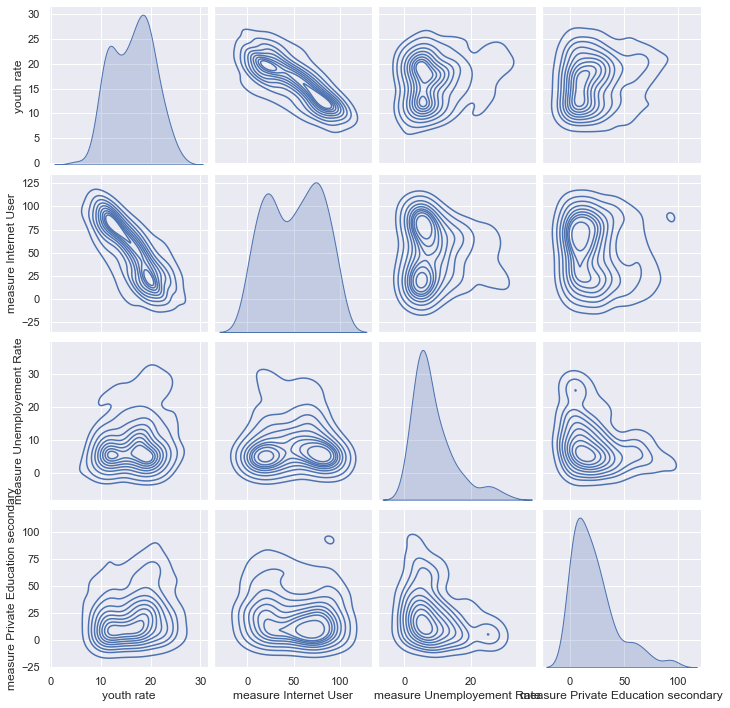

In [82]:
azer=sns.pairplot(data_final,
             kind="kde",
             x_vars=["youth rate","measure Internet User","measure Unemployement Rate","measure Private Education secondary"],
             y_vars=["youth rate","measure Internet User","measure Unemployement Rate","measure Private Education secondary"],
             #hue="Region"
                 )
plt.xticks(rotation= 45)
plt.yticks(rotation= 45)


In [83]:
data_region

,Region,code,Total_Population,Youth_population,private_secondary_enrollement,gross_enrolment_secondary,internet_user,personal_computer,unemployment_ratio,GDP_capita,youth_leteracy
0,East Asia & Pacific,EAPA,2.273265e+09,333981307.0,26.650587,84.566346,45.638807,18.879208,5.837931,15374.736216,94.046465
1,Europe & Central Asia,EUCA,9.119609e+08,108040216.0,12.034573,105.973190,74.319663,32.729266,9.391837,31578.347290,99.599351
2,Latin America & Caribbean,LACA,6.376263e+08,106567059.0,30.480317,89.353380,54.523335,10.227111,8.845161,12240.898510,96.393821
3,Middle East & North Africa,MENA,4.367207e+08,74130683.0,16.873276,82.880342,57.957443,15.602573,10.423810,13990.017098,92.914197
4,North America,NOAM,3.594793e+08,49528130.0,18.011590,93.012884,88.005579,65.552941,5.950000,61848.050831,NaN
5,South Asia,SOAS,1.766383e+09,334872503.0,31.049289,70.122135,28.313673,4.052155,4.587500,2816.237498,83.459350
6,Sub-Saharan Africa,SSAF,1.031692e+09,197543832.0,26.120011,46.730877,20.312099,3.469602,9.673913,2080.059192,72.692007


In [84]:
region_prio=['Latin America & Caribbean','Europe & Central Asia','Middle East & North Africa']
pe_list=data_final[data_final['Region']=='e']
for i in region_prio:
    pe_list=pe_list.append(data_final[data_final['Region']==i])
pe_list.head(1)

,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy,youth rate
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Latin America & Caribbean,25324.720362,111.174522,93.542454,9.917683,93.864899,104822.0,NaN,14455.0,99.13841,2011.0,2012.0,2016.0,2006.0,2012.0,2016.0,NaN,2015.0,2010.0,13.790044


In [85]:
pe_list.describe()

,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy,youth rate
count,115.000000,107.000000,113.000000,106.000000,105.000000,1.190000e+02,101.000000,1.040000e+02,85.000000,115.000000,107.000000,113.000000,106.000000,105.000000,119.000000,101.0,104.000000,85.000000,104.000000
mean,22144.951300,95.849237,64.621724,21.694001,19.280486,1.669166e+07,9.438614,2.776327e+06,96.857298,2015.521739,2013.355140,2015.725664,2005.735849,2013.495238,2015.924370,2016.0,2014.432692,2008.235294,14.649404
std,28224.808005,21.219899,22.320546,22.847234,20.340666,3.084298e+07,5.548116,4.824632e+06,7.607041,1.703185,4.958797,2.486563,2.130513,1.152954,0.472277,0.0,2.318203,10.291752,3.789710
min,739.595436,17.517790,0.000000,0.792447,0.275850,3.126400e+04,0.200000,4.251000e+03,52.318890,2006.000000,1983.000000,1990.000000,1994.000000,2006.000000,2013.000000,2016.0,2003.000000,1970.000000,5.034547
25%,4776.570911,85.806931,51.349874,5.873750,3.577230,8.578180e+05,5.500000,2.656585e+05,97.949330,2016.000000,2014.000000,2016.000000,2005.000000,2013.000000,2016.000000,2016.0,2015.000000,2009.000000,11.452400
50%,12160.110629,98.091858,69.087915,13.299763,13.893010,5.662544e+06,8.000000,1.058339e+06,99.057110,2016.000000,2015.000000,2016.000000,2006.000000,2014.000000,2016.000000,2016.0,2015.000000,2011.000000,14.188965
75%,28744.613009,106.467808,79.778791,26.144893,26.474131,1.393052e+07,11.800000,2.727512e+06,99.719820,2016.000000,2015.000000,2016.000000,2007.000000,2014.000000,2016.000000,2016.0,2015.000000,2015.000000,17.518616
max,168146.015281,166.808472,98.240016,96.170657,93.864899,2.076529e+08,27.000000,3.359557e+07,100.000000,2016.000000,2016.000000,2016.000000,2009.000000,2015.000000,2016.000000,2016.0,2015.000000,2016.000000,23.875799


In [86]:
third_quar=pe_list.describe().iloc[[5]]
third_quar.iloc[0,0]

12160.110629295

In [87]:
pe_list=pe_list[pe_list['measure GPD per Capita']>third_quar.iloc[0,0]]
pe_list=pe_list[pe_list['measure Gross Enrolement Secondary']>third_quar.iloc[0,1]]
pe_list=pe_list[pe_list['measure Internet User']>third_quar.iloc[0,2]]
pe_list=pe_list[pe_list['measure Personal computers']>third_quar.iloc[0,3]]
pe_list=pe_list[pe_list['measure Private Education secondary']>third_quar.iloc[0,4]]
pe_list=pe_list[pe_list['measure Unemployement Rate']>third_quar.iloc[0,6]]
pe_list=pe_list[pe_list['measure Youth Population']>third_quar.iloc[0,7]]
pe_list=pe_list[pe_list['measure Youth literacy']>third_quar.iloc[0,8]]
pe_list



,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy,youth rate
Country Code,,,,,,,,,,,,,,,,,,,,,
ESP,Spain,Europe & Central Asia,26639.740588,129.810486,80.561333,39.494836,24.687469,46443959.0,19.6,4285743.0,99.62216,2016.0,2015.0,2016.0,2007.0,2014.0,2016.0,2016.0,2015.0,2016.0,9.227773
PRT,Portugal,Europe & Central Asia,19839.643151,119.135193,70.423567,18.339421,20.663271,10324611.0,11.1,1148782.0,99.43512,2016.0,2015.0,2016.0,2008.0,2014.0,2016.0,2016.0,2015.0,2011.0,11.126637


In [88]:
data_testee=data_final
third_quara=data_testee.describe().iloc[[5]]


data_testee=data_testee[data_testee['measure GPD per Capita']>third_quara.iloc[0,0]]
data_testee=data_testee[data_testee['measure Gross Enrolement Secondary']>third_quara.iloc[0,1]]
data_testee=data_testee[data_testee['measure Internet User']>third_quara.iloc[0,2]]
data_testee=data_testee[data_testee['measure Personal computers']>third_quara.iloc[0,3]]
data_testee=data_testee[data_testee['measure Private Education secondary']>third_quara.iloc[0,4]]
#data_testee=data_testee[data_testee['measure Total Population']>third_quara.iloc[0,5]]
data_testee=data_testee[data_testee['measure Unemployement Rate']>third_quara.iloc[0,6]]
data_testee=data_testee[data_testee['measure Youth Population']>third_quara.iloc[0,7]]
#data_testee=data_testee[data_testee['measure Youth literacy']>third_quara.iloc[0,8]]
data_testee


,Country Name,Region,measure GPD per Capita,measure Gross Enrolement Secondary,measure Internet User,measure Personal computers,measure Private Education secondary,measure Total Population,measure Unemployement Rate,measure Youth Population,measure Youth literacy,year GPD per Capita,year Gross Enrolement Secondary,year Internet User,year Personal computers,year Private Education secondary,year Total Population,year Unemployement Rate,year Youth Population,year Youth literacy,youth rate
Country Code,,,,,,,,,,,,,,,,,,,,,
ARG,Argentina,Latin America & Caribbean,12440.320982,106.777901,70.150764,9.056130,29.621519,43847430.0,8.8,6886530.0,99.30000,2016.0,2014.0,2016.0,2005.0,2013.0,2016.0,2016.0,2015.0,2015.0,15.705664
BEL,Belgium,Europe & Central Asia,41236.266589,166.808472,86.516500,37.628187,59.175720,11348159.0,7.8,1241946.0,NaN,2016.0,2015.0,2016.0,2005.0,2014.0,2016.0,2016.0,2015.0,NaN,10.944031
CHL,Chile,Latin America & Caribbean,13792.926054,100.646187,66.010000,14.077827,63.031601,17909754.0,6.7,2817084.0,99.04828,2016.0,2015.0,2016.0,2005.0,2014.0,2016.0,2016.0,2015.0,2013.0,15.729328
ESP,Spain,Europe & Central Asia,26639.740588,129.810486,80.561333,39.494836,24.687469,46443959.0,19.6,4285743.0,99.62216,2016.0,2015.0,2016.0,2007.0,2014.0,2016.0,2016.0,2015.0,2016.0,9.227773
FRA,France,Europe & Central Asia,36854.968280,110.644012,85.622200,64.677574,31.050011,66896109.0,10.1,7567872.0,NaN,2016.0,2014.0,2016.0,2006.0,2014.0,2016.0,2016.0,2015.0,NaN,11.312873
VEN,"Venezuela, RB",Latin America & Caribbean,15692.412878,89.664009,60.000000,9.260681,35.736629,31568179.0,7.2,5479911.0,98.75951,2014.0,2015.0,2016.0,2005.0,2014.0,2016.0,2016.0,2015.0,2016.0,17.358971


In [89]:
indicateur_final_p

,Country Code,Indicator Code,year,measure
0,WLD,PRJ.POP.2024.3.MF,2010,208591.78
1,ALB,PRJ.POP.2024.3.MF,2010,109.88
2,DZA,PRJ.POP.2024.3.MF,2010,1102.79
3,ARG,PRJ.POP.2024.3.MF,2010,1672.05
4,ARM,PRJ.POP.2024.3.MF,2010,224.89
...,...,...,...,...
12687,VEN,PRJ.MYS.2039.MF,2100,13.40
12688,VNM,PRJ.MYS.2039.MF,2100,12.80
12689,PSE,PRJ.MYS.2039.MF,2100,14.30
12690,ZMB,PRJ.MYS.2039.MF,2100,12.40


In [90]:
A=indicateur_final_p[indicateur_final_p['Country Code']=="ARG"]
lista=['BEL','CHL','ESP','VEN']
for i in lista:
    A=A.append(indicateur_final_p[indicateur_final_p['Country Code']==i])

Text(0.5, 0, "moyenne années d'études: Age 20-39")

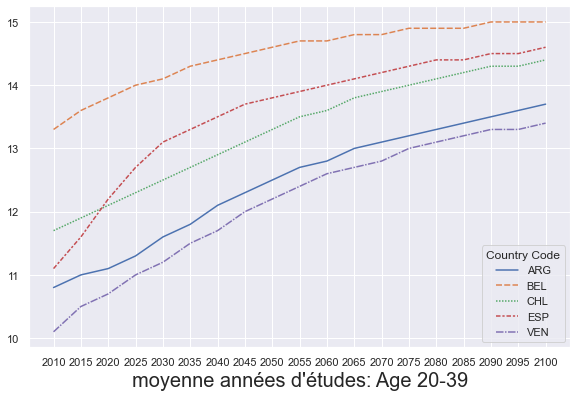

In [91]:
B=A[A['Indicator Code']=='PRJ.MYS.2039.MF']
projection=B.pivot("year","Country Code",'measure')
projection=projection.reset_index().set_index('year')
projection.columns
ax=sns.lineplot(data=projection)
#ax.set(xlabel='moyenne d''années d''études: Age 20-39')
#ax.axes.set_title("Title",fontsize=50)
ax.set_xlabel("moyenne années d'études: Age 20-39",fontsize=20)
#ax.set_ylabel("Y Label",fontsize=20)


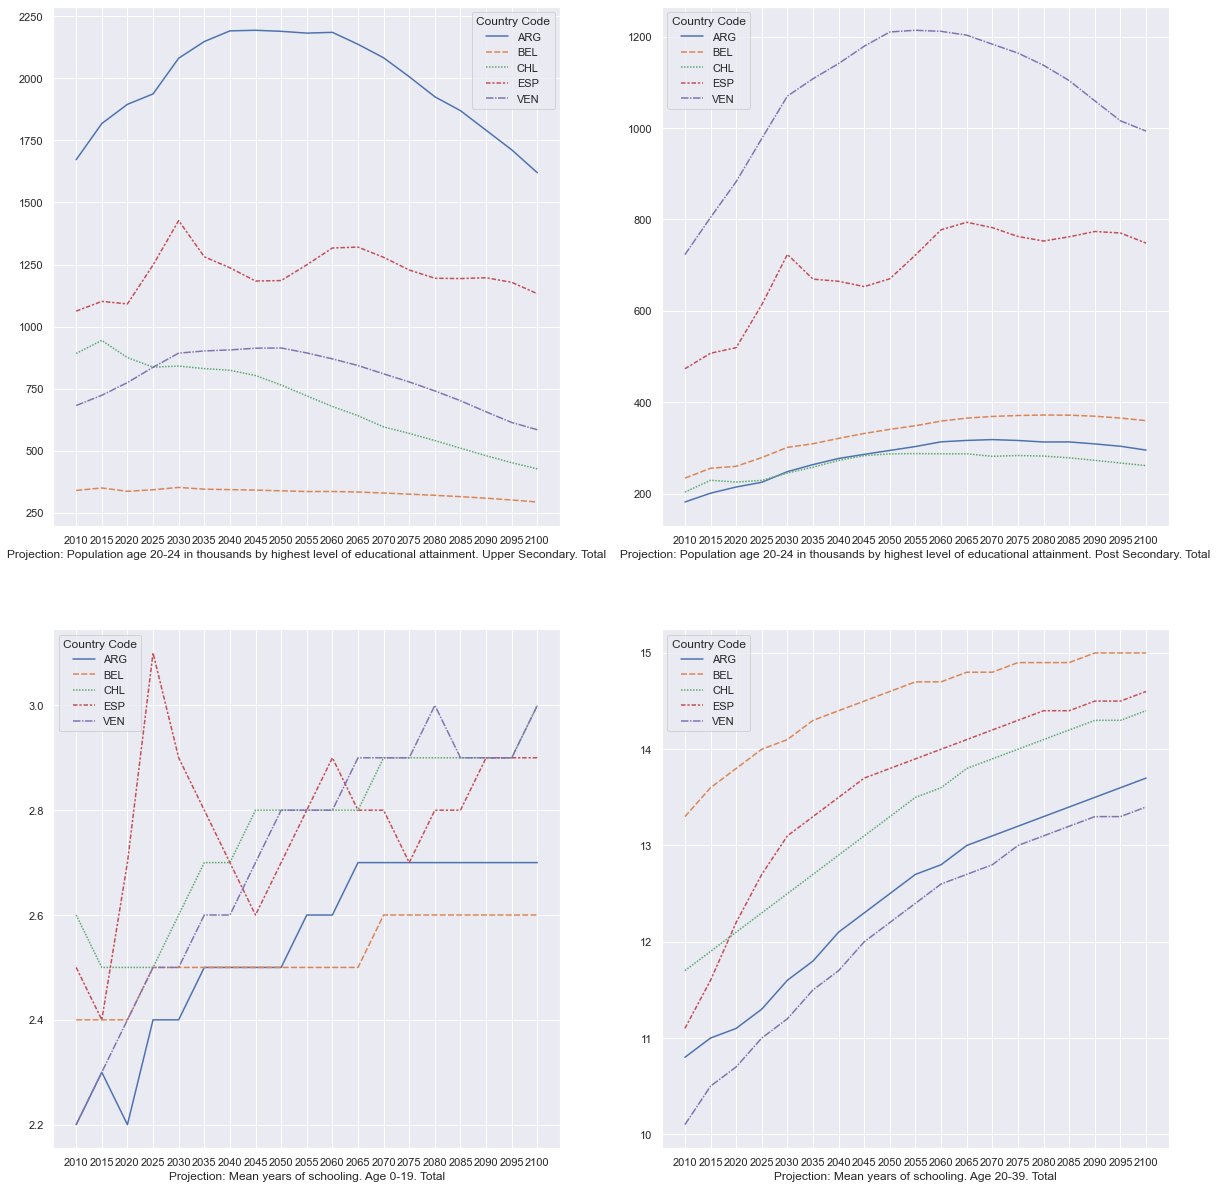

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(20, 21))

j=0
k=0
for i in ind_codes :
    B=A[A['Indicator Code']==i]
    projection=B.pivot("year","Country Code",'measure')
    projection=projection.reset_index().set_index('year')
    projection.columns
    #sns.lineplot(data=projection)
    sns.lineplot(ax=axes[k,j], data=projection)
    #sns.barplot(ax=axes[k,j], x="code",y=i, data=data_region)
    indicat=ind_prooj[ind_prooj['Series Code']==i]
    #ind_codes.append(indicateur2.iloc[0,0])
    axes[k,j].set(xlabel=indicat.iloc[0,2])
    j+=1
    if(j==2):
        j=0
        k+=1

projection=A.pivot(["Country Code","Indicator Code"],"year")

In [93]:
ind_codes

['PRJ.POP.2024.3.MF',
 'PRJ.POP.2024.4.MF',
 'PRJ.MYS.0T19.MF',
 'PRJ.MYS.2039.MF']

In [94]:
data_testee=data_final
third_quara=data_testee.describe().iloc[[4]]


data_testee=data_testee[data_testee['measure GPD per Capita']>third_quara.iloc[0,0]]
data_testee=data_testee[data_testee['measure Gross Enrolement Secondary']>third_quara.iloc[0,1]]
data_testee=data_testee[data_testee['measure Internet User']>third_quara.iloc[0,2]]
data_testee=data_testee[data_testee['measure Personal computers']>third_quara.iloc[0,3]]
data_testee=data_testee[data_testee['measure Private Education secondary']>third_quara.iloc[0,4]]
#data_testee=data_testee[data_testee['measure Total Population']>third_quara.iloc[0,5]]
data_testee=data_testee[data_testee['measure Unemployement Rate']>third_quara.iloc[0,6]]
data_testee=data_testee[data_testee['measure Youth Population']>third_quara.iloc[0,7]]
#data_testee=data_testee[data_testee['measure Youth literacy']>third_quara.iloc[0,8]]
data_testee[['Country Name','Region']]


,Country Name,Region
Country Code,,
ALB,Albania,Europe & Central Asia
ARG,Argentina,Latin America & Caribbean
AUS,Australia,East Asia & Pacific
AUT,Austria,Europe & Central Asia
AZE,Azerbaijan,Europe & Central Asia
BEL,Belgium,Europe & Central Asia
BRA,Brazil,Latin America & Caribbean
CHE,Switzerland,Europe & Central Asia
CHL,Chile,Latin America & Caribbean


In [95]:


#sns.lineplot(data=A, x="year", y="measure", hue="month", style="month"))